# This notebook is the initial data analysis for the Assignment 2 dataset

The aim is to find out aspects of the dataset that might be worthy of note later down the datascience pipeline

First we import the required libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Mount drive to load datasets from drive onto the notebook


Check that mount worked and view available datasets

Read in datasets using pandas


In [2]:
df1 = pd.read_csv('../data/person1-step-data.csv')
df2 = pd.read_csv('../data/person2-step-data.csv')

Check columns and their types, we can see that `Date` is still in str

In [3]:
print('Person 1 dtypes')
print(df1.dtypes)
print('\nPerson 2 dtypes')
print(df2.dtypes)

Person 1 dtypes
Source    object
Date      object
Hour       int64
Count      int64
dtype: object

Person 2 dtypes
Source    object
Date      object
Hour       int64
Count      int64
dtype: object


Convert columns to correct data type


In [4]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

Now we can explore the data, here we check number of 
- rows and columns
- unique number of sources step counts were gathered from
- start and end of data collection
- number of days where data is present
- quick check for the `hour` column

In [5]:
def summary(df):
    print(f"df shape: {df.shape}")
    print(f"Sources include {df['Source'].unique()}")
    print(f"First day: {df['Date'].min()}")
    print(f"Last day: {df['Date'].max()}")
    print(f"Number of days: {len(df['Date'].unique())}")
    print(f"First hour: {df['Hour'].min()}")
    print(f"Last hour: {df['Hour'].max()}")

In [6]:
summary(df1)

df shape: (183787, 4)
Sources include ['Person1 iPhone SE' 'Person1 Mi Fit' 'Person1 Misfit'
 'Person1 Health Mate' 'Person1 Apple\xa0Watch']
First day: 2014-12-07 00:00:00
Last day: 2021-09-22 00:00:00
Number of days: 2295
First hour: 0
Last hour: 23


In [7]:
summary(df2)

df shape: (486259, 4)
Sources include ['Person2 Phone' 'Person2 Watch']
First day: 2014-11-29 00:00:00
Last day: 2021-09-22 00:00:00
Number of days: 2490
First hour: 0
Last hour: 23


Interestingly enough `person 2` only has two sources of data whereas `person one` has 5
`Person 1` started recording 9 days later, but has 195 fewer days recorded

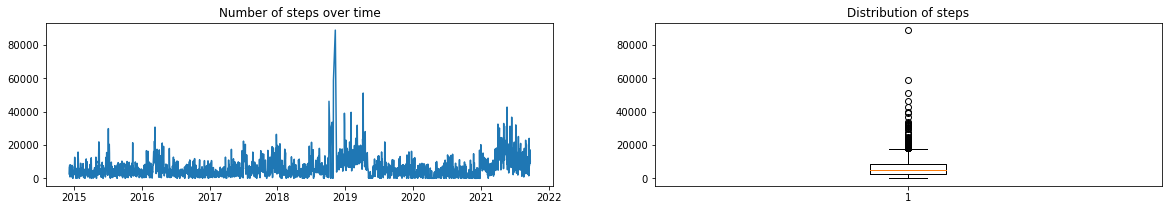

<Figure size 640x480 with 0 Axes>

In [8]:
def daily_steps(df):
    plt.rcParams["figure.figsize"] = (20,3)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Number of steps over time')
    ax2.set_title('Distribution of steps')
    plt.figure(figsize=(8, 6), dpi=80)
    df = df.groupby('Date').sum()
    ax1.plot(df['Count'])
    ax2.boxplot(df['Count'])
daily_steps(df1)

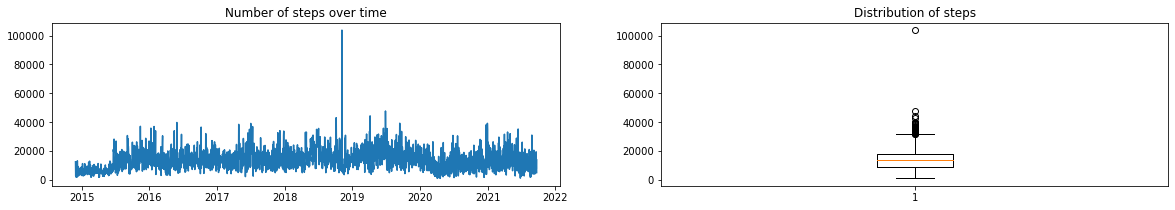

<Figure size 640x480 with 0 Axes>

In [9]:
daily_steps(df2)

It seems that `person 2` has a higher average daily number of steps compared to 
`person 1` 